### First we define some functions and import some modules

In [1]:
from math import sin,cos,pi,log,exp
import matplotlib.pyplot as plt
import numpy as np
import cfeplib

### Here we read the rmsd time-series or trajectory

In [2]:
f=open('redtraj-5-0.rmsd')
lrmsd=[]
for l in f:
    l=l.split()
    lrmsd.append(float(l[1]))
f.close()

### Next, we plot all frames of the rmsd time-series

to see how it behaves. As one can see it mainly fluctuates around 11, though some times it goes to low values around 5-4 and some times to high values around 17-20. We plot every 100-th frame to make the plot less dense. There are 5 transitions to the region around 4-5.

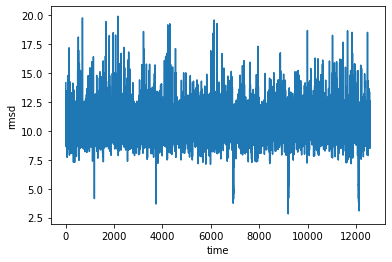

In [3]:
plt.plot(lrmsd[0:-1:100])
plt.xlabel('time')
_=plt.ylabel('rmsd')

### Next we make the free energy profile (FEP) as a function of rmsd

one can use either comp_Zca with a=-1 or comp_Zh, we will use the former

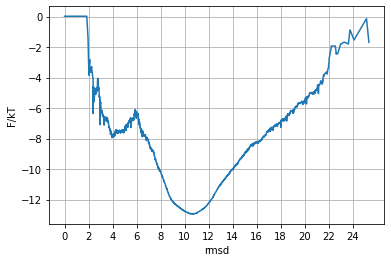

In [4]:
lx,lzh=cfeplib.comp_Zca(lrmsd,a=-1,dx=0.01,dt=1,strict=False)
lf=[-log(zh*2) for zh in lzh]

plt.plot(lx,lf)
plt.xticks(np.arange(0, 25, step=2))
plt.grid()
plt.xlabel('rmsd')
_=plt.ylabel('F/kT')



The free energy profile shows two minima, one around rmsd=4 and another around rmsd=11. The barrier separating them is around rmsd=6. The height of the barrier is around 2.

We are interested how good the rmsd reaction coordinate describes the transition between the two minima. To check that we will use the committor optimality criterion. Since the best reaction coordinate to describe the transition between two minima is the committor.

The criterion shows how close is the coordinate to the committor. For the committor the criterion is approximately constant. For suboptimal coordinates it is not. We will use the transition path summation, for that we import module cfeplib and use functions comp_ekn_tp and comp_Zca_ekn. 

We first transform the rmsd to the committor as a function of rmsd, symbolically $rmsd \rightarrow q(rmsd)$. And then construct $Z_{C,1}$ profiles as a function of q for different $\Delta t$

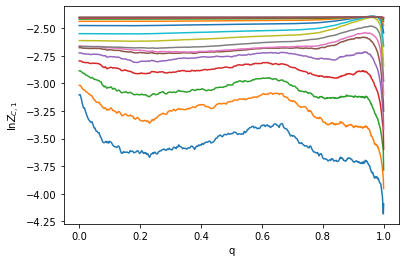

In [5]:
lq=cfeplib.to_committor(lrmsd,0.01,4,11)

ldt=[2**i for i in range(16)]
dx=0.001
for dt in ldt:
    ekn=cfeplib.comp_ekn_tp(lq,x0=0,x1=1,dx=dx,dt=dt)
    lx,lzc1=cfeplib.comp_Zca_ekn(ekn,a=1)
    plt.plot(lx,-np.log(lzc1))
plt.xlabel('q')
_=plt.ylabel('$\ln Z_{C,1}$')

As one can see the profiles are not constant. the difference is about 1.5, which translates in a error in description of kinetics of $\exp(1.5) \sim 4.5$. It is a not large error, but not small either.

One thing that is strange is that $Z_{C,1}(q,\Delta t=1)$ (blue curve) is not constant. This could be due to breakdown of diffusion approximation.